In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv('/content/StudentStatistics.csv', sep=';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [3]:
data.groupby('Teach_Motivate')['Over_Grade'].agg(['mean', 'median', 'std', 'min', 'max'])

,mean,median,std,min,max
Teach_Motivate,,,,,
Agree,78.000000,75.0,12.179217,65.0,98.0
Disagree,52.777778,50.0,18.219343,20.0,80.0
Fully Disagree,36.812500,38.0,14.725120,10.0,65.0
Fully agree,84.600000,85.0,10.526158,70.0,98.0
Neither disagree nor agree,69.181818,70.0,16.898628,30.0,100.0


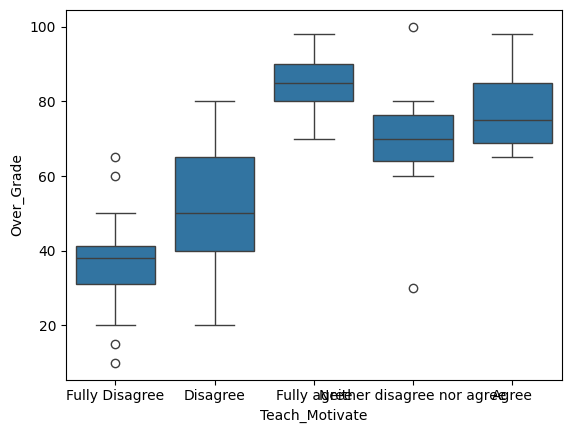

In [4]:
import seaborn as sns

sns.boxplot(x='Teach_Motivate', y='Over_Grade', data=data)
plt.show()

<Axes: xlabel='Over_Grade', ylabel='Count'>

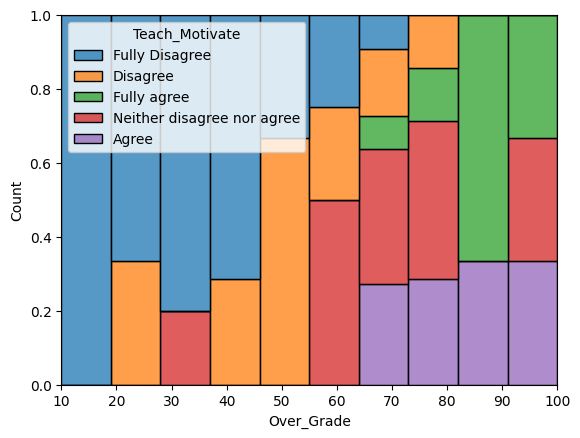

In [5]:
sns.histplot(data=data, x='Over_Grade', hue='Teach_Motivate', bins=10, multiple='fill')
#“layer”, “dodge”, “stack”, “fill

<Axes: xlabel='Over_Grade', ylabel='Count'>

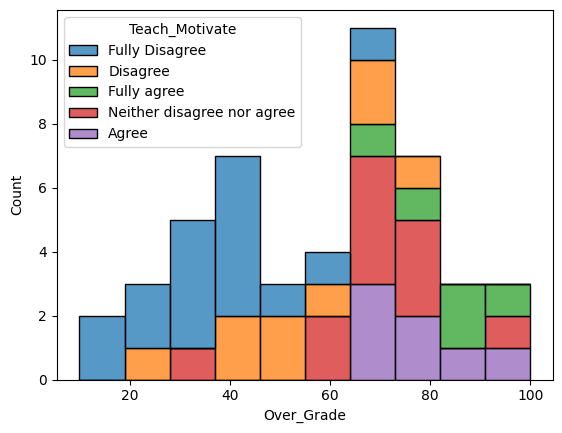

In [6]:
sns.histplot(data=data, x='Over_Grade', hue='Teach_Motivate', bins=10, multiple='stack')

<Axes: xlabel='Over_Grade', ylabel='Count'>

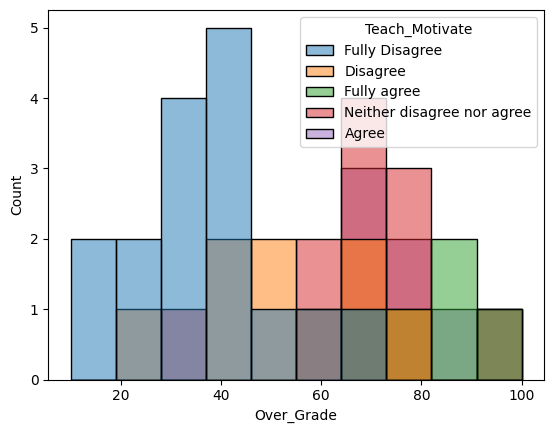

In [7]:
sns.histplot(data=data, x='Over_Grade', hue='Teach_Motivate', bins=10, multiple='layer')


<Axes: xlabel='Over_Grade', ylabel='Count'>

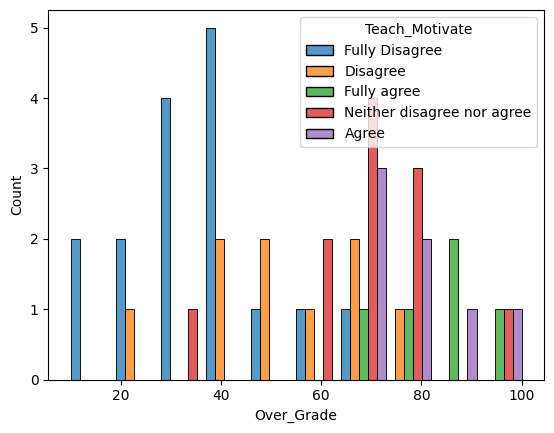

In [8]:
sns.histplot(data=data, x='Over_Grade', hue='Teach_Motivate', bins=10, multiple='dodge')


In [9]:
data['Teach_Motivate'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [10]:
coding = {'Fully Disagree':1, 'Disagree':2, 'Fully agree':5, 'Neither disagree nor agree':3, 'Agree':4}

In [11]:
mydata = data[['Teach_Motivate','Over_Grade']]

In [13]:
mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(coding)

<ipython-input-13-5d196f41f1d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(coding)


In [14]:
mydata.corr(method='spearman')

,Teach_Motivate,Over_Grade
Teach_Motivate,1.0000,0.7872
Over_Grade,0.7872,1.0000


Spearman rho varies between -1 and +1. If it is -1 there is a perfect negative monotonic relationship, if it is 0 there is no monotonic relationship and at +1 there is a perfect positive monotonic relationship. Monotonic means that it is constantly increasing or constantly decreasing. A positive relation means that if one variable goes up, the other also goes up (for example number of ice cream sold versus temperature), a negative relation indicates if one goes down, the other goes up (for example number of winter jackets sold versus temperature).



*   H0 - no relation between motivation and marks
*   Ha - there is a relation




In [15]:
from scipy.stats import spearmanr

In [16]:
spearmanr(mydata, nan_policy='omit')

SignificanceResult(statistic=0.7871998951252405, pvalue=3.236363793284169e-11)

In [17]:
statistic=0.7871998951252405
pvalue=3.236363793284169e-11

In [19]:
rho = abs(statistic)

if abs(rho) < 0.1:
    qual = 'Negligible'
elif abs(rho) < 0.2:
    qual = 'Weak'
elif abs(rho) < 0.4:
    qual = 'Moderate'
elif abs(rho) < 0.6:
    qual = 'Relatively strong'
elif abs(rho) < 0.8:
    qual = 'Strong'
else:
    qual = 'Very strong'

qual

'Strong'

In [ ]:
Teach_Motivate has a strong positive impact Over_Grade
p < 0.05 , rho = 0.78